Adiabatic Shock

We have the following Hydro equations to solve:
$\partial_tf_1+\partial_xf_1=0$ 
$\partial_tf_2+\partial_xf_2=-\partial_xP$ 
$\\$$\partial_tf_3+\partial_xf_3=-\partial_x(Pu)$ 

with $f_1=\rho$,$f_2=\rho u$,$f_3=\rho e_{tot}$

In the case of adiabatic processes, we know that $P=K\rho^{\gamma}$ and $c_s^2=\frac{\gamma P}{\rho}=(\gamma-1)(\epsilon+\frac{P}{\rho})$ and $h=\epsilon+\frac{P}{\rho}=e_{tot}-\frac{1}{2}$ so $c_s^2=(\gamma-1)(\frac{\rho e_{tot}}{\rho} - \frac{0.5(\rho u)^2}{\rho^2})$ and thus 
$c_s^2=(\gamma-1)(\frac{f_3}{f_1}-\frac{f_2^2}{2f_1^2})=\frac{2}{3}(\frac{f_3}{f_1}-\frac{f_2^2}{2f_1^2})$

We also know $\epsilon=\frac{P}{\rho(\gamma-1)}$. So using the relations above $\frac{P}{\rho(\gamma-1)}=e_{tot}-\frac{u^2}{2}-\frac{P}{\rho}$, which becomes $P=\frac{2}{5}(f_3-\frac{f_2^2}{2f_1})$.

And from the third hydro equation, the energy equation above we have 
 $f_{3,i}^{n+1}=f_{3,i}^{n+1/2}-\frac{\Delta t}{2 \Delta x}(P_{i+1}u_{i+1}-P_{i-1}u_{i-1})$

<IPython.core.display.Javascript object>


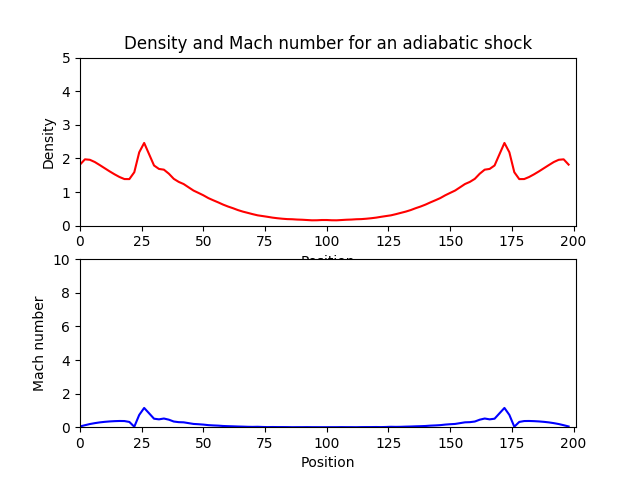

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Set up the grid, time and grid spacing, and the sound speed squared
Ngrid = 100
Nsteps = 1000
dt = 0.01
dx = 2.0

#initial conditions
x = np.arange(Ngrid) * dx # grid
f1 = np.ones(Ngrid) # rho
f2 = np.zeros(Ngrid) # rho * u
f3 = np.ones(Ngrid) # rho* e_tot without perturbation
u = np.zeros(Ngrid+1) # advective velocity (keep the 1st and last element zero)
P = np.zeros(Ngrid) #pressure
c = np.zeros(Ngrid) #speed of sound

def advection(f, u, dt, dx):
    # calculating flux terms
    J = np.zeros(len(f)+1) # keeping the first and the last term zero
    J[1:-1] = np.where(u[1:-1] > 0, f[:-1] * u[1:-1], f[1:] * u[1:-1])
    f = f - (dt / dx) * (J[1:] - J[:-1]) #update
    return f

# Apply initial Gaussian perturbation
Amp, sigma = 10000, Ngrid/12
f3 = f3 + Amp * np.exp(-(x - x.max()/2) ** 2 / sigma ** 2)

# plotting

plt.ion()
fig, ax = plt.subplots(2,1)

snapshot_density = np.zeros(Ngrid) 
snapshot_velocity = np.zeros(Ngrid)

x1, = ax[0].plot(x, f1, 'r-')
x2, = ax[1].plot(x, f2, 'b-')

ax[0].set_xlim([0, dx*Ngrid+1])
ax[0].set_ylim([0, 5])
ax[1].set_xlim([0, dx*Ngrid+1])
ax[1].set_ylim([0, 10])

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Mach number')
ax[0].set_title('Density and Mach number for an adiabatic shock')

fig.canvas.draw()

for ct in range(Nsteps):
    # advection velocity at the cell interface
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))

    # update the density and momentum
    f1 = advection(f1, u, dt, dx)
    f2 = advection(f2, u, dt, dx)

    # update the pressure
    P = 2/5 *(f3-((f2**2)/(2*f1)))
    
    # add the source term to the Euler equation
    f2[1:-1] = f2[1:-1] - 0.5 * (dt / dx) * (P[2:] - P[:-2])

    # correct for source term at the boundary (reflective)
    f2[0] = f2[0] - 0.5 * (dt / dx) * (P[1] - P[0])
    f2[-1] = f2[-1] - 0.5 * (dt / dx) * (P[-1] - P[-2])

    # updated advection velocity at the cell interface again
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))
    
    # update energy
    f3 = advection(f3, u, dt, dx)
    
    # update pressure 
    P = (2/5)*(f3 - ((f2**2)/(2*f1)))
    
    # add the source term to the energy equation
    f3[1:-1] = f3[1:-1] - 0.5 * (dt / dx) * ((f2[2:]/f1[2:])*P[2:] - (f2[:-2]/f1[:-2])*P[:-2])
    
    # correct the energy equation for source term at the boundary (reflective) 
    f3[0] = f3[0] - 0.5 * (dt / dx) * ((f2[1]/f1[1])*P[1] - (f2[0]/f1[0])*P[0])
    f3[-1] = f3[-1] - 0.5 * (dt / dx) * ((f2[-1]/f1[-1])*P[-1] - (f2[-2]/f1[-2])*P[-2])
    
    #finally update pressure again and sound speed
    P = (2/5)*(f3 - ((f2**2)/(2*f1)))
    c = np.sqrt((5/3)*(P/f1))
    
    # Take snapshots for the two questions
    if ct == 200:
        snapshot_density = f1
        snapshot_velocity = f2/f1
    
    # update the plot
    x1.set_ydata(f1)
    x2.set_ydata(np.abs(f2)/c)
    fig.canvas.draw()
    plt.pause(0.001)


Answer to question 1: Density pre shock is approximately equal to 1 and post shock it is approximately equal to 4. Therefore the ratio of densities pre- and post-shock is $\frac{1}{4}$. This is consistent with strong shock in a monotonic gas from the notes.

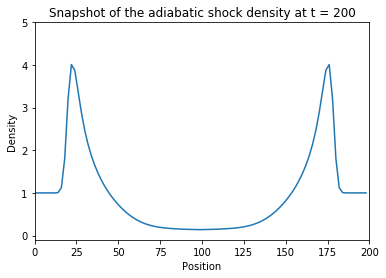

In [7]:
%matplotlib inline
plt.xlabel('Position')
plt.ylabel('Density')
plt.xlim([0,200])
plt.ylim([-0.1,5])
plt.plot(x, snapshot_density)
plt.title('Snapshot of the adiabatic shock density at t = 200')
plt.show()

Question 2: The width of the shock is $\Delta \approx \nu/u$